In [47]:
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
# Load dataset (skip first 4 metadata rows)
df = pd.read_csv(
    "API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv",
    skiprows=4
)

df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [69]:
# Explicit list of known non-country names to exclude
exclude_keywords = [
    'World', 'Asia', 'Africa', 'Europe', 'America',
    'income', 'Income',
    'demographic', 'dividend',
    'OECD', 'Euro',
    'IDA', 'IBRD',
    'countries', 'classification',
    'area', 'region',
    'fragile'
]
df_countries = df.copy()

for word in exclude_keywords:
    df_countries = df_countries[
        ~df_countries['Country Name'].str.contains(word, case=False, na=False)
    ]


In [70]:
population_2022 = df_countries[['Country Name', '2022']].dropna()

top10_countries = population_2022.sort_values(
    by='2022',
    ascending=False
).head(10)

print(top10_countries['Country Name'].tolist())


['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russian Federation', 'Mexico']


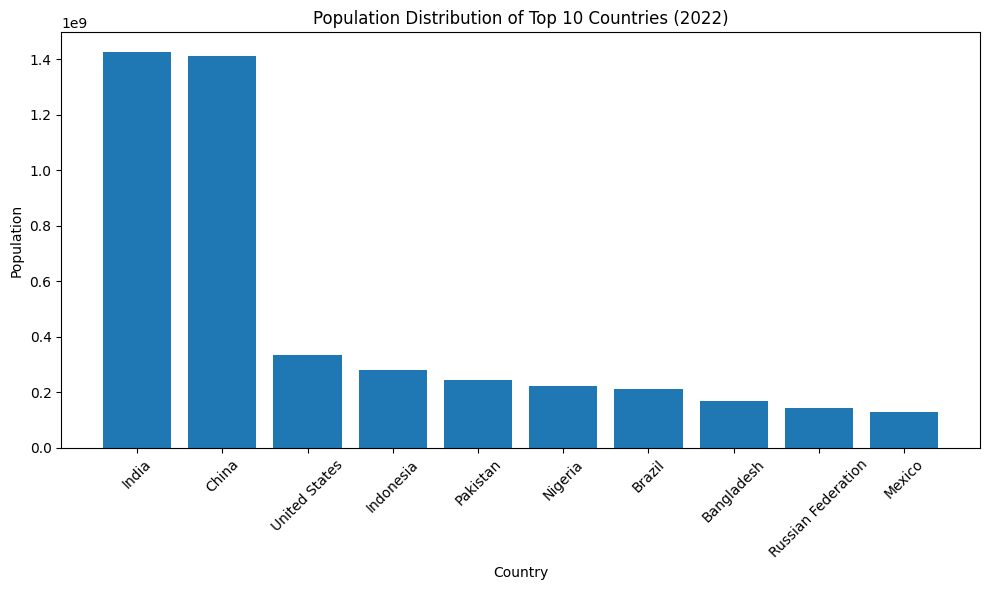

In [71]:
plt.figure(figsize=(10,6))
plt.bar(top10_countries['Country Name'], top10_countries['2022'])
plt.title('Population Distribution of Top 10 Countries (2022)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


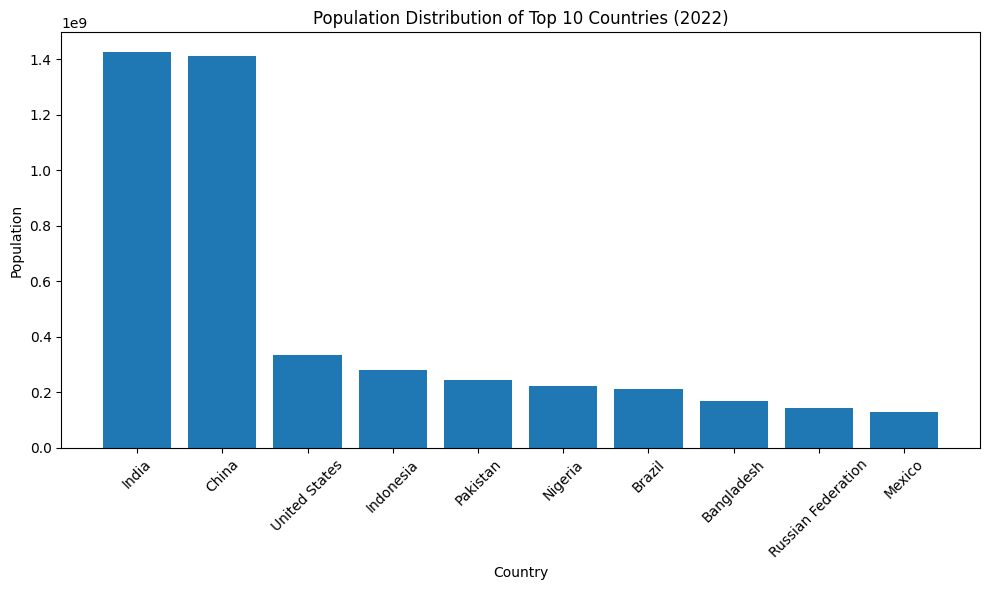

In [73]:
plt.figure(figsize=(10,6))
plt.bar(
    top10_countries['Country Name'],
    top10_countries['2022']
)

plt.title('Population Distribution of Top 10 Countries (2022)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("population_distribution_top10_2022.png")
plt.show()




## Conclusion
This visualization represents the population distribution of the
top 10 most populous countries in 2022 using World Bank data.
The bar chart clearly compares population sizes across countries,
fulfilling the objective of Task 1.
